In [46]:
from pendulum_forces import MagneticPendulumInvSpherical, MagneticPendulumXY
import numpy as np
import sympy as sp
from scipy.constants import g as g_value
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, root
from scipy.cluster.vq import kmeans2
from matplotlib import pyplot as plt
# %matplotlib widget

In [47]:
# P = MagneticPendulumInvSpherical(4)
P = MagneticPendulumXY(4)

const1_subs = {
    'm': 1,
    'g': g_value,
    'L': g_value,
    'R': 2,
    'h': 0.5,
    'b': 0.1,   
}
magnet_strength = 1

magnet_polarity_vals = dict((p.name, magnet_strength) for p in P.polarity_list)
constant_subs = const1_subs | magnet_polarity_vals

bob = P.create_bob(constant_subs=constant_subs)

ddt = P._get_ddt(bob=bob)

In [48]:
magnet_positions = []
for magnet_pos in P.magnet_positions_C:
    magnet_pos = magnet_pos.subs(constant_subs)
    magnet_positions.append([magnet_pos.dot(P.coordsystem.C.i), magnet_pos.dot(P.coordsystem.C.j)])
# magnet_positions

equilibria_regions = np.array(magnet_positions + [[0,0]], dtype=np.float64)
equilibria_regions

array([[ 2.,  0.],
       [ 0.,  2.],
       [-2.,  0.],
       [ 0., -2.],
       [ 0.,  0.]])

In [49]:
equilibria_guesses = np.array([[x,y,0,0,0,0] for x,y in equilibria_regions])
equilibria_guesses

array([[ 2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.,  0.,  0.],
       [-2.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [50]:
ddt_time_ignorant = lambda y: ddt(0, y)

In [51]:
ddt(0, [0,0,0,0,0,0])

array([0., 0., 0., 0., 0., 0.])

In [52]:
equilibria = np.array([
    fsolve(ddt_time_ignorant, e)[:2] for e in equilibria_guesses
])

equilibria

array([[ 1.93617289,  0.        ],
       [ 0.        ,  1.93617289],
       [-1.93617289,  0.        ],
       [ 0.        , -1.93617289],
       [ 0.        ,  0.        ]])

Text(0, 0.5, 'y')

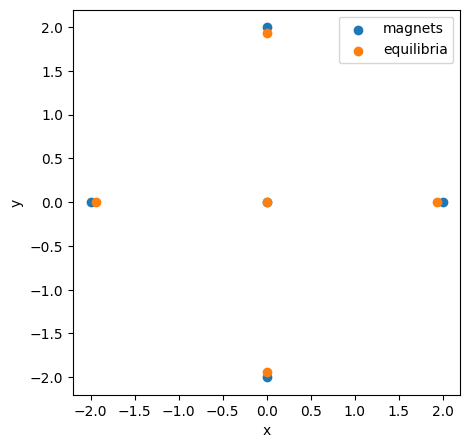

In [61]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(equilibria_regions.T[0], equilibria_regions.T[1], label='magnets')
ax.scatter(equilibria.T[0], equilibria.T[1], label='equilibria')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')